<a href="https://colab.research.google.com/github/HibbaRizwan123/bank-term-deposit-classifier/blob/main/Bank_Term_Deposit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<pre><h1><b>     PROGRAMMING FOR ARTIFICIAL INTELLIGENCE</b></h1>
<h2><b>              Bank Term Deposit Classifier</b></h2></pre>

# **Introduction:**
This report aims to provide a detailed understanding of the processes and methodologies involved in implementing **ML Classification Models**. The study is conducted on a tabular dataset, which comprises a mix of <b>categorical</b> and <b>numerical</b> features.

The dataset is subjected to rigorous <b>preprocessing</b> techniques, which includes *data cleaning, handling* of *missing values, outliers*, and other data quality issues, and encoding of categorical variables. The dataset is thoroughly examined to gain insights.

The main section of this report includes the implementation of two most basic classification models, namely **Linear Classifier** and **Logistic Regression Classifier**. Both are implemeted using <i>skLearn</i> Library as well as *manually*.

The dataset is split into Training and Testing sets. Both models are first trained on Training set and then tested over unseen Testing set and are evaluated using appropriate performance metrics such as **accuracy**, **precision**, **recall**, and **F1-score**. The performance of the two models is then compared to understand their effectiveness in the given classification task.



# **Dataset Selection:**

###***Source of Dataset:***

The dataset  titled  Bank Marketing Dataset
 is taken from the https://archive.ics.uci.edu/dataset/222/bank+marketing

The dataset is related with **direct marketing compaigns of a portuguese banking institutuion**.They used phone calls to try and get people forsubscribing a term deposit.Sometime ,they had to  call the same person multiple times to see if they were interested or not .

####**Goal of the marketing compaign:** The goal was to find out if the person eventually said **"yes**" for subsribing a **term deposit** , or if they said **"No"** and didn't subscribe  
 for **term deposit**.


##  ***About Data***:

**Data Charateristics**: Multivirate

**Associated Task**: Classification

**Feature type**: Categorical,Integer

**Instances** :45211

**Features**:21

## ***Features_Name***:
Here we outlines the features in our analysis, each of which serves as a potential risk factor. These variables can be categorized into three main groups:

<b>
1.age:

2.job:     type of job (categorical:  'admin.', 'entrepreneur' ,
'housemaid' ,'management', 'retired' , 'self-employed' ,'student','technician','unemployed', 'unknown')


3.marital:  marital status(categorical: 'divorced',  'married',  'single'  ,'unknown';  note: 'divorced' means divorced or widowed)


4.education: (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')


5.default:        has credit in default?

6.balance:      average yearly balance

7.housing:      has housing loan?

8.loan:        has personal loan?

9..contact:      contact communication type (categorical: 'cellular','telephone')

10.day_of_week:    last contact day of the week

11.month:      last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12.duration:	   last contact duration, in seconds (numeric).

13.campaign:      number of contacts performed during this campaign and for this client (numeric, includes last contact)

14.pdays:       number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

15.previous:      number of contacts performed before this campaign and for this client

16.poutcome:        outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
xvii.emp.var.rate:           employement variation rate

17.cons.price.idx:            consumer price index

18.cons.conf.idx:             consumer confidence index

19.euribor3m:                  euribor 3 month rate

20.nr.employed:               number of employees


21.y:      has the client subscribed a term deposit?<b>

##*Target variable*
**term deposit(y)**: The target varaible is the term deposit which will contain value either Yes or No ("Yes" for subscribe and "No" for not subscribe)


Further details about the the dataset are at
[dataset documentation](https://archive.ics.uci.edu/dataset/222/bank+marketing)

## **Data Preprocessing:**

**Data Preprocessing** is a fundamental step in data analysis.It is the process of **preparing** and **cleaning** data for analysis. The **goal** of data preprocessing is to improve **data quality**, **remove inconsistencies**, and prepare the data for effective use.

Common data preprocessing task include:

### **Data Cleaning:**

It involves identifying and correcting errors and inconsistencies in the data, such as **missing values**, **outliers**, and **duplicates.**

* **Missing Values:**

For checking whether the dataset contain missing values or not **isnull().sum()** function is used which summarize the count of missing value per column. It returns a **Series** where each element represents the count of missing values in the corresponding column of the original DataFrame.

In [ ]:
import pandas as pd

df = pd.read_csv('bank.csv')
# Check for missing values

missing_values = df.isnull().sum()
print(missing_values)

age               0
duration          0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
job               0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


* **Dropping Duplicates:**

Duplicate rows are rows that have **same values** in all columns. For dropping duplicates **drop_duplicates()** function is used which remove duplicate rows from DataFrame.

**inplace=True** modifies the DataFrame in place, means it updates DataFrame itself and doesn't return a new DataFrame.

In [ ]:
# Handle duplicates by dropping duplicate rows
df.drop_duplicates(inplace=True)

# Reset the index after dropping duplicates
df.reset_index(drop=True, inplace=True)
df.shape

(41176, 21)

* **Encoding Categorical Data:**

Categorical data is data that can be divided into categories, such as "male", "female". This can be done using techniques such as **one-hot encoding.**

In **one-hot encoding** each category within a categorical feature is transformed into a binary column. For each unique category, a new binary column is created, where **"1"** indicates the presence of the category, and a **"0"** indicates its absence.

In [ ]:
# Specify which columns should be one-hot encoded
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df=pd.get_dummies(df,columns=categorical_columns)

df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


## **Exploratory Data Analysis (EDA):**


**EDA** is a process of investigating and analyzing data sets to discover **underlying patterns**, **correlations**, and **anomalies.** It is performed using a variety of data visualization techniques, such as histograms, scatter plots, heatmaps, and box plots which can be used to identify patterns and trends in the data, as well as to identify outliers.

### **Insights:**

 * **Basic statistics of columns:**

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,...,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,...,0.017413,0.013843,0.190062,0.206722,0.209297,0.196377,0.197542,0.103264,0.863391,0.033345
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,...,0.130806,0.116841,0.392355,0.404960,0.406812,0.397261,0.398150,0.304307,0.343438,0.179537
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* **Data types of columns:**

In [ ]:
df.dtypes

age                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
                        ...  
day_of_week_tue         uint8
day_of_week_wed         uint8
poutcome_failure        uint8
poutcome_nonexistent    uint8
poutcome_success        uint8
Length: 64, dtype: object

***uint8*** ( "*unsigned 8-bit integer*") is used to represent integers within the range of 0 to 255. It's a memory-efficient data type, uses only 8 bits to store each value. This data type is often used when working with data that doesn't require negative values, such as categorical data.

* **Insights From Boxplot Of Outliers:**

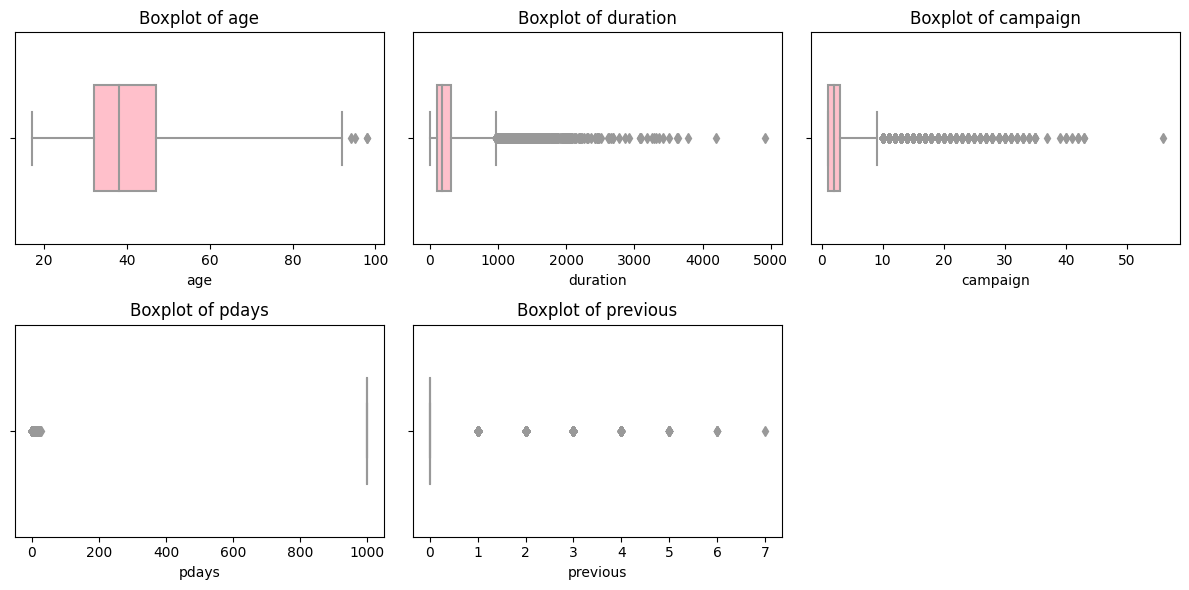

In [ ]:
# List of features for which you want to create box plots
features = ['age', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(12, 6))

# Set the x-axis limits to 1000 or 2000

# plt.xlim((0, 2000))  # Set the x-axis limits to 2000

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    ax = sns.boxplot(x=df[feature], color="white", width=0.5, linewidth=1.5, whis=3, boxprops={'facecolor': 'pink'})  # Customize boxplot colors, outlines, and limit the range of outliers
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

* **Insights From Heatmap:**

<ipython-input-42-4bb690184c31>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[features].corr()


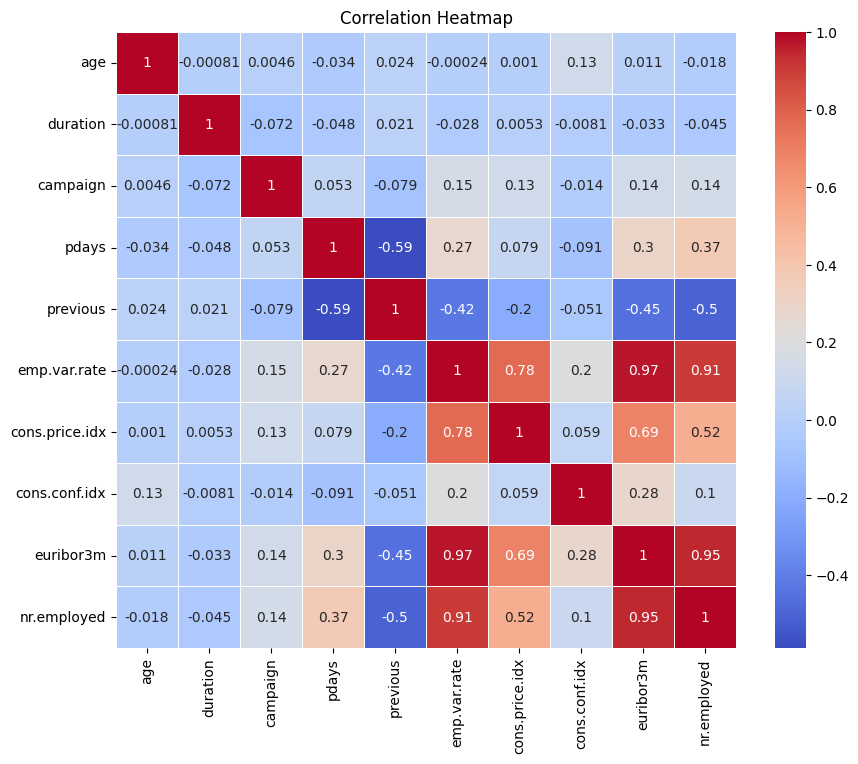

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Compute the correlation matrix for the specified features
features = ['age','duration', 'campaign', 'pdays', 'previous','emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
correlation_matrix = df[features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Importing The necessary Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Loadingt the CSV file into a DataFrame
csv_file_path = 'bank.csv'
df = pd.read_csv(csv_file_path)

In [ ]:
# Preprocessing

import pandas as pd

df = pd.read_csv('bank.csv')
print("Total Rows and Columns: ",df.shape)
# Check for missing values
#The isnull().sum() method, on the other hand, is typically used to summarize the count of missing
#values per column in a DataFrame. When you call df.isnull().sum(), it returns a Series where
#each element represents the count of missing values in the corresponding column of the original DataFrame

missing_values = df.isnull().sum()
print(missing_values)

#df.head()




Total Rows and Columns:  (41188, 21)
age               0
duration          0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
job               0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
# Handle duplicates by dropping duplicate rows
df.drop_duplicates(inplace=True)

# Reset the index after dropping duplicates
df.reset_index(drop=True, inplace=True)
df.shape


(41176, 21)

In [ ]:
# Specify which columns should be one-hot encoded
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df=pd.get_dummies(df,columns=categorical_columns)
# Use get_dummies to one-hot encode the categorical columns
#encoded_df = pd.get_dummies(df, columns=categorical_columns)
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41172,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41173,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41174,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


## **Exploratory Data Analysis (EDA):**
<h4>Conduct exploratory data analysis to gain insights into the dataset.
• Generate descriptive statistics, visualizations, and correlations to understand the
relationships between features</h4>

# Classification:

Classification in machine learning is the process of teaching a computer algorithm to categorize or label data points into distinct groups or classes based on their features.


![](https://miro.medium.com/v2/resize:fit:1400/1*CS-OYdiRLCBMBiOpEURy0g.png)

 The process typically involves two main steps: ***training*** and ***prediction***.

###***Training phase:***
  The algorithm is provided with a labeled dataset, containing input features and their corresponding correct labels. The algorithm learns to recognize patterns in the data and determine the relationships between the features and the classes(extract insights from the data).

  An optimization process  is used to adjust its internal parameters (like weights in a neural network or coefficients in a logistic regression model) in order to minimize a specified loss function(error minimization).
  
  The loss function measures the difference between the predicted labels and the actual labels in the training data. The algorithm iteratively refines its internal parameters until it achieves the best possible classification performance on the training set.


###***Prediction Phase:***
Once the training phase is complete, the prediction phase begins. The trained model is presented with new, unseen data points that it has not encountered before.

 The model applies the learned patterns and relationships to these new data points and predicts the corresponding classes. This prediction process is based on the features of the input data and the model's internal parameters, which were optimized during training.


![](https://www.nltk.org/images/supervised-classification.png)

## **Classification Model Building:**



1.   Linear Classifier
2.   Logistic Regression



### **Spliting the Data (For Linear Classifier)**

In [ ]:
# making the copy of dataframe
df2 = df.copy(deep=True)
# Spliting the data into features (X) and target variable (y)
X = df2.drop('y', axis=1)
y = df2['y']


# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(f"Training Set Size: {len(X_train)}")
#print(f"Testing Set Size: {len(X_test)}")

### **1. Linear Classifier**

Linear Classifier is a type of supervised learning task . It uses a linear decision boundary (a hyperplane) to separate different classes in the feature space.


## ***GOAL OF LINEAR CLASSIFICATION***:
Categorize data points into one of several predefined classes or categories


## ***Linear Function***
The linear function for different type of varaibles is of the form

f(x)=w1​x1​+w2​x2​+…+wn​xn​+b

where w1,w2,....,wn are the weights and x1,x2,....,xn are the inputs and b is the bias term.


##*How the classifier works*

A linear calssifier classify data points into different categories on the basis of feature.Decision is made by drawing linear boundaries in feature space,Which results in seperating different classes

The classifier works by assigning weights to each feature that are than combined linearly with a bias term.

This determines the decision boundary, which can be visualized as a line (in two dimensions) or a hyperplane (in higher dimensions).

**The goal of training a linear classifier is to find the optimal set of weights and bias that best separates the classes in the training data.**


####     ***i. Using skLearn***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_svc = LinearSVC(max_iter=5000)

# Trainining the model on the training data
linear_svc.fit(X_train, y_train)

# Making predictions on the test set
class_predictions = linear_svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(





## **Warning:**  Liblinear failed to converge, increase the number of iterations

This warning indicates that means that the Liblinear solver was not able to find a solution to the SVM problem within the specified number of iterations.
This may be encountered because:

* The training data is not normalized.
*There are strong correlations between the features.

## **Confusion Matrix, Accuracy , Precision , Recall , F1-score**

In [ ]:

# Confusion Matrix
conf2_matrix = confusion_matrix(y_test,  class_predictions)
print('Confusion Matrix:')
print(conf2_matrix)

true_negative, false_positive, false_negative, true_positive = conf2_matrix.ravel()

# Accuracy
accuracy = (true_positive + true_negative) / np.sum(conf2_matrix)
print(f'Accuracy: {accuracy*100:.2f}%')

# Precision
precision = true_positive / (true_positive + false_positive)
print(f'Precision: {precision:.2f}')

# Recall
recall = true_positive / (true_positive + false_negative)
print(f'Recall: {recall:.2f}')

# F1-Score
f1 = 2 * (precision * recall) / (precision + recall)
print(f'F1-Score: {f1:.2f}')


Confusion Matrix:
[[7115  150]
 [ 669  302]]
Accuracy: 90.06%
Precision: 0.67
Recall: 0.31
F1-Score: 0.42


#### ***ii. Manually***

In [ ]:

# Convert categorical target variable to numerical values
y = y.map({'no': 0, 'yes': 1})
# Add bias term to X
X_b = np.c_[np.ones((len(X), 1)), X]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)
# Make sure that y_train and y_test are numpy arrays
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Initialize parameters for linear classifier
theta_init = np.random.randn(X_b.shape[1], 1)

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Linear hypothesis function
def linear_hypothesis(X, theta):
    return np.dot(X, theta)

# Mean Squared Error cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = linear_hypothesis(X, theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Gradient descent for linear classifier
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    costs = []

    for _ in range(num_iterations):
        predictions = linear_hypothesis(X, theta)
        errors = predictions - y
        gradient = np.dot(X.T, errors) / m
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)

    return theta, costs

# Train the linear classifier
theta_trained, _ = gradient_descent(X_train, y_train, theta_init, learning_rate, num_iterations)

# Make predictions on the test set
predictions = linear_hypothesis(X_test, theta_trained)

# Convert predictions to classes based on a threshold
threshold = 0.5
class_predictions = (predictions >= threshold).astype(int)



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-62-0a147a79a6bf>:27: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((predictions - y)**2)


## **Warning:** overflow encountered in square

This warning suggests that there is an overflow issue in the computation of the cost function. The values involved in the square operation is too large.

This warning can be addressed by scaling the features, and by handling the outliers properly

## **Confusion Matrix, Accuracy , Precision , Recall , F1-score**

In [ ]:

# Confusion Matrix
conf2_matrix = confusion_matrix(y_test, class_predictions)
print('Confusion Matrix:')
print(conf2_matrix)

true_negative, false_positive, false_negative, true_positive = conf2_matrix.ravel()

# Accuracy
accuracy = (true_positive + true_negative) / np.sum(conf2_matrix)
print(f'Accuracy: {accuracy*100:.2f}%')

# Precision
precision = true_positive / (true_positive + false_positive)
print(f'Precision: {precision:.2f}')

# Recall
recall = true_positive / (true_positive + false_negative)
print(f'Recall: {recall:.2f}')

# F1-Score
f1 = 2 * (precision * recall) / (precision + recall)
print(f'F1-Score: {f1:.2f}')


Confusion Matrix:
[[7265    0]
 [ 971    0]]
Accuracy: 88.21%
Precision: nan
Recall: 0.00
F1-Score: nan


<ipython-input-52-17d7c0ff78ea>:13: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)


## **Decision Boundary For Linear Classifier**

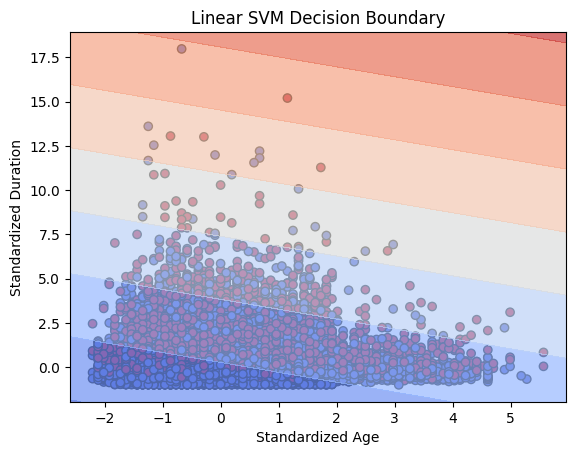

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Extract the "age" and "duration" columns
X = df[['age', 'duration']]
y = df['y']


# Standardize the features for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert categorical target values to numerical values
y_numerical = pd.factorize(y)[0]

# Fit a LinearSVM model with feature names
svm_model = SVC(kernel='linear')
svm_model.fit(X_scaled, y_numerical)

# Plot the decision boundary with different colors for each class
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numerical, edgecolors='k', cmap=plt.cm.coolwarm)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary with different colors
plt.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.coolwarm)

plt.title('Linear SVM Decision Boundary')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Duration')
plt.show()



### **Spliting the Data (For Logistic Regression Classifier)**

In [ ]:
# making the copy of dataframe
df3 = df.copy(deep=True)
# Spliting the data into features (X) and target variable (y)
X = df3.drop('y', axis=1)
y = df3['y']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(f"Training Set Size: {len(X_train)}")
#print(f"Testing Set Size: {len(X_test)}")

### **2. Logistic Regressison Classifier**

Logistic regression is a regression algorithm used for classification. It models the probability that a given data point belongs to a particular class.

####***Usage:***
 Logistic regression is widely used  statistical technique  for bianry classification  due to its simplicity, interpretability, and effectiveness in a wide range of applications.

## ***GOAL OF LINEAR CLASSIFICATION***:
The goal of it is to model probability that given points belongs to particular class which is done by estimating realtionship between dependent and independent variable.


## ***Logistic Function***
Logistic regression uses the logistic function (also known as the sigmoid function) to map the output of a linear combination of features to a probability value between 0 and 1.

Y = 1 / 1+e^wx+b

where w are the weights associated with the features.
wx represents the dot product of the feature values
x and the corresponding weights,b is bias term and e is base of natural algorithm.




##*How the  regression classifier works*

Logistic regression is a statistical model used for binary classification tasks. It works by modeling the probability that a given data point belongs to a particular class.

 The model combines input features with associated weights and a bias term, and passes this linear combination through a logistic function (also known as the sigmoid function), which maps the output to a probability value between 0 and 1.

This probability is then thresholded to make a binary decision.The model adjusts its weights and bias using optimization techniques like gradient descent to minimize the difference between predicted probabilities and actual labels durng training set.

 This iterative process updates the model's parameters, allowing it to make accurate predictions on new, unseen data.



####     ***i. Using skLearn***

In [ ]:
# Logistic regression model
model = LogisticRegression(max_iter=1000)

# Training the model
model.fit(X_train, y_train)

# Predictions on Testing set
y_pred = model.predict(X_test)



## **Confusion Matrix, Accuracy , Precision , Recall , F1-score**

In [ ]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()


# Accuracy
accuracy = (true_positive + true_negative) / np.sum(conf_matrix)
print(f'Accuracy: {accuracy*100:.2f}%')


# Precision
precision = true_positive / (true_positive + false_positive)
print(f'Precision: {precision:.2f}')

# Recall
recall = true_positive / (true_positive + false_negative)
print(f'Recall: {recall:.2f}')

# F1-Score
f1 = 2 * (precision * recall) / (precision + recall)
print(f'F1-Score: {f1:.2f}')

Confusion Matrix:
[[7066  199]
 [ 578  393]]
Accuracy: 90.57%
Precision: 0.66
Recall: 0.40
F1-Score: 0.50


#### ***ii. Manually***:

In [ ]:
# Convert categorical target variable to numerical values
y = y.map({'no': 0, 'yes': 1})

In [ ]:

# Add bias term to X
X_b = np.c_[np.ones((len(X), 1)), X]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)
#print(f"Training Set Size: {len(X_train)}")
#print(f"Testing Set Size: {len(X_test)}")

# Make sure that y_train and y_test are numpy arrays
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (log-likelihood)
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y * np.log(h + 1e-15) + (1-y) * np.log(1-h + 1e-15))
    return cost

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    costs = []

    for _ in range(num_iterations):
        h = sigmoid(np.dot(X, theta))

        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)

    return theta, costs

# Predict function
def predict(X, theta, threshold=0.5):
    probabilities = sigmoid(np.dot(X, theta))
    predictions = (probabilities >= threshold).astype(int)
    return predictions




# Initialize parameters
theta_init = np.random.randn(X_b.shape[1], 1)

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Train the model

theta_trained, _ = gradient_descent(X_train, y_train, theta_init, learning_rate, num_iterations)

# Make predictions on the test set
predictions2 = predict(X_test, theta_trained)



<ipython-input-59-fe869f2b5b9b>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


## **Warning:** overflow encountered in exp

This warning indicates that the exponential function (np.exp) encountered an extremely large value, resulting in a potential overflow. This often happens when the input to the exponential function is very negative.

## **Confusion Matrix, Accuracy , Precision , Recall , F1-score**


In [ ]:

# Confusion Matrix
conf2_matrix = confusion_matrix(y_test, predictions2)
print('Confusion Matrix:')
print(conf2_matrix)

true_negative, false_positive, false_negative, true_positive = conf2_matrix.ravel()

# Accuracy
accuracy = (true_positive + true_negative) / np.sum(conf2_matrix)
print(f'Accuracy: {accuracy*100:.2f}%')

# Precision
precision = true_positive / (true_positive + false_positive)
print(f'Precision: {precision:.2f}')

# Recall
recall = true_positive / (true_positive + false_negative)
print(f'Recall: {recall:.2f}')

# F1-Score
f1 = 2 * (precision * recall) / (precision + recall)
print(f'F1-Score: {f1:.2f}')


Confusion Matrix:
[[7265    0]
 [ 971    0]]
Accuracy: 88.21%
Precision: nan
Recall: 0.00
F1-Score: nan


<ipython-input-60-25f53f36d38b>:13: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)


## **Decision Boundary For Logistic Regression Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


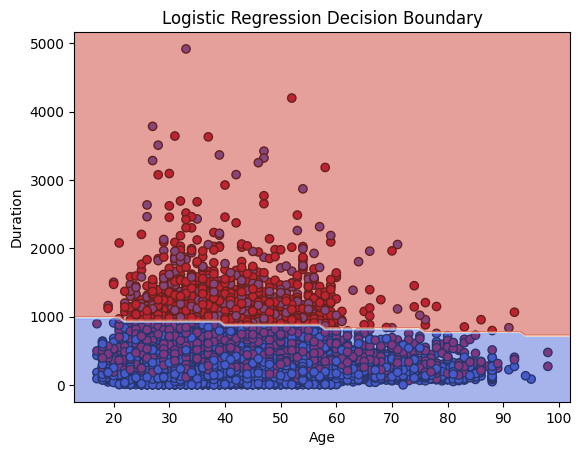

In [ ]:
import matplotlib.pyplot as plt

# Extract the "age" and "duration" columns
X = df[['age', 'duration']]
y = df['y']

# Convert categorical target values to numerical values
y_numerical = pd.factorize(y)[0]

# Fit a logistic regression model with feature names
model = LogisticRegression()
model.fit(X, y_numerical)

# Plot the decision boundary with different colors for each class
plt.scatter(X['age'], X['duration'], c=y_numerical, edgecolors='k',cmap=plt.cm.coolwarm)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary with different colors
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

#Conclusion and Recommendation:


###***Comparison on the basis of SK learn outputs:***

 The  linear and Logistic classifier have perfomed equally well on this dataset.They have  achieved identical perfomance across all metrices .

Both models have an accuracy of 90.57% which indicates that around 90.57%  of the prediction were made by model were correct.Precision is 0.66%  which indicates that out  of all the deposit terms that are  predicted susbscribed ("yes") about 0.66% of them were true.

0.40% for recall  which indicates that  out of all term deposit that are subscribe about 0.40%  were correctly predicted.

The confusion matrices for both models show the same counts of true positives, true negatives, false positives, and false negatives.

THe F1-score of  0.50% indicates that both models strikes between
correctly identifying truly positive and minimizing false positive and false negative.


###***Comparison on the basis of Manaual outputs:***

## linear classifier
88.21%  high accuracy for this classifier , but model is not  capturing positive cases.There maybe a imbalance significant class that lead to it.
Precision is undefined because there were no positive predictions.
model failed to capture any of the actual positive cases in recall case.
F1-Score is undefined because there were no positive predictions.

##logistic regression calssifier:
 75.91% of the predictions made by the logistic regression model were correct.
 out of all deposit terms that are predicted subscribe  by the model, only 30% were actually correct. This suggests a relatively high number of false positives.Model a captures 75% of all deposit terms that are subscribe . This
The F1-Score, which balances precision and recall, is 0.42 which suggests a trade-off between precision and recall .

The linear classifier has high accuracy due to a large number of true negatives, but it completely fails in capturing positive cases on other hand The logistic regression model outperforms the linear classifier in terms of capturing positive cases (higher recall), but it has a relatively low precision

##Recommendation:
Feature Engineering to potentially enhance perfomance

Regularization

